# Directed Null Model Generation

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

import math

%matplotlib inline

In [15]:
G = nx.read_edgelist('largest_component_networkx_format.csv', comments='#',
                     create_using=nx.Graph(), 
                     delimiter=',', 
                     nodetype=int, 
                     encoding='utf-8')

## Basic Features of this Network

In [16]:
N = len(G)
L = G.size()
degrees = [G.degree(node) for node in G]
kmin = min(degrees)
kmax = max(degrees)

In [17]:
print("Number of nodes: ", N)
print("Number of edges: ", L)
print()
print("Average degree: ", 2*L/N)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin)
print("Maximum degree: ", kmax)



Number of nodes:  8932
Number of edges:  13995

Average degree:  3.133676668159427
Average degree (alternate calculation) 3.133676668159427

Minimum degree:  1
Maximum degree:  379


In [18]:
# Get 10 logarithmically spaced bins between kmin and kmax
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

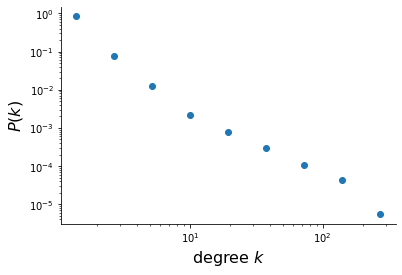

In [19]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [20]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges = np.linspace(kmin, kmax, num=20)

# histogram the data into these bins
density, _ = np.histogram(degrees, bins=bin_edges, density=True)

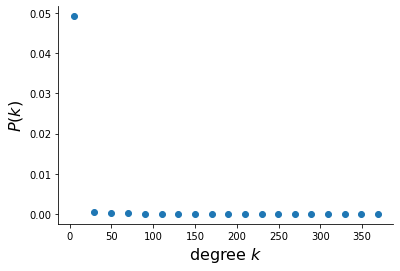

In [21]:
fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [25]:
H = G.copy()

nx.connected_double_edge_swap(H, nswap=1*len( G.edges() ))

7528

In [26]:
N_1 = len(H)
L_1 = H.size()
degrees_1 = [H.degree(node) for node in H]
kmin_1 = min(degrees_1)
kmax_1 = max(degrees_1)

print("Number of nodes: ", N_1)
print("Number of edges: ", L_1)
print()
print("Average degree: ", 2*L_1/N_1)
print("Average degree (alternate calculation)", np.mean(degrees))
print()
print("Minimum degree: ", kmin_1)
print("Maximum degree: ", kmax_1)

Number of nodes:  8932
Number of edges:  13995

Average degree:  3.133676668159427
Average degree (alternate calculation) 3.133676668159427

Minimum degree:  1
Maximum degree:  379


The Degree distribution seems to be the same

In [28]:
H_1 = G.copy()

In [29]:
nx.connected_double_edge_swap(H_1, nswap=50*len( G.edges() ), _window_threshold=3, seed=None)

347914

In [30]:
j = 3
nx.write_weighted_edgelist(H_1, "Undirected_Random_Null_Model_{}".format(j))

In [31]:
for i in range(1,1000):
    H = G.copy()
    nx.connected_double_edge_swap(H, nswap=20*len( G.edges() ), _window_threshold=3, seed=None)
    nx.write_weighted_edgelist(H, "Undirected_Unweighted_Models/Undirected_Unweighted_Random_Null_Model_{}".format(i))